In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
## Create 100 gene names and store in genes
genes = ['gene' + str(i) for i in range(1,101)]

In [ ]:
genes

In [ ]:
wt = ['wt' + str(j) for j in range(1,6)]
ko = ['ko' + str(k) for k in range(1,6)]

In [ ]:
print(wt)

In [ ]:
print(ko)

In [ ]:
data = pd.DataFrame(columns = [*wt,*ko], index = genes)

In [29]:
## Filling dat using poisson distribution & generating random numbers with mean between 10 & 1000
## Note that the genes stores in rows represent different dimensions while columns are different samples
## PCA expects the samples in rows and independent features in columns, so we transpose the data before using it
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)

In [30]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,594,643,650,610,632,457,438,490,488,480
gene2,704,735,696,735,736,734,728,731,747,725
gene3,768,820,764,811,770,145,130,118,138,147
gene4,676,694,708,691,662,315,291,308,313,308
gene5,911,930,900,881,883,713,754,688,717,704


In [31]:
data.shape

(100, 10)

In [ ]:
## Center the data at 0 & Scale the data before running PCA
## After centering, the mean of each gene will be 0 & after scaling the std deviation of each gene becomes 1
scaled_data = preprocessing.scale(data.T)
scaled_data

In [47]:
## Another more populare way to scale data suing StandardScaler class
scaler = preprocessing.StandardScaler()

In [ ]:
scaled_data2 = scaler.fit_transform(X = data.T, y = None)
scaled_data2

In [49]:
## PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [56]:
## Plotting the scree plots
## Step 1: Calculate the % of variation that each PC accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
##Create labels for Scree plot
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

In [62]:
pca_data

array([[-9.59919058e+00,  8.24950463e-01, -2.00049928e-01,
        -3.17432726e-01,  2.08123957e+00,  1.11576822e-01,
         1.00851403e+00,  4.90094966e-01,  5.14068427e-01,
         1.48012970e-15],
       [-9.63797230e+00,  2.44752308e+00, -1.85172536e+00,
         7.74325993e-02, -8.37171798e-01, -6.72315902e-01,
         3.32360875e-02,  1.56361129e-02, -7.18838243e-01,
         7.14879336e-16],
       [-9.73725286e+00, -2.06258739e-01,  3.51880266e+00,
         4.09912816e-01, -1.77071341e-01,  1.09843956e-01,
         3.73966907e-02, -3.62330169e-02, -5.49775216e-01,
         5.58868640e-15],
       [-9.19791733e+00, -1.08678263e+00, -1.26304432e-01,
        -5.35743074e-01, -1.21997822e-01, -1.45189652e+00,
        -1.18062244e+00, -4.90689367e-01,  6.70112064e-01,
         3.61339934e-15],
       [-9.70612673e+00, -1.96252132e+00, -1.34593359e+00,
         3.78006293e-01, -9.58254462e-01,  1.86495066e+00,
         8.22829611e-02,  6.42633045e-03,  1.17664718e-01,
         4.

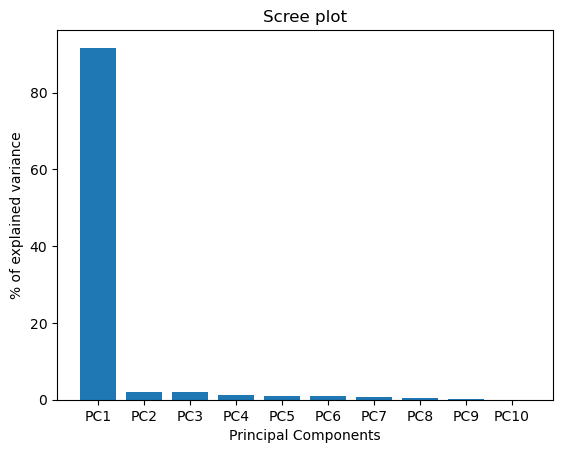

In [63]:
## Plot the bar chart - Scree Plot
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.xlabel('Principal Components')
plt.ylabel('% of explained variance')
plt.title('Scree plot')
plt.show()

In [66]:
pca_df =pd.DataFrame(pca_data, index= [*wt,*ko], columns = labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.599191,0.824950,-0.200050,-0.317433,2.081240,0.111577,1.008514,0.490095,0.514068,1.480130e-15
wt2,-9.637972,2.447523,-1.851725,0.077433,-0.837172,-0.672316,0.033236,0.015636,-0.718838,7.148793e-16
wt3,-9.737253,-0.206259,3.518803,0.409913,-0.177071,0.109844,0.037397,-0.036233,-0.549775,5.588686e-15
wt4,-9.197917,-1.086783,-0.126304,-0.535743,-0.121998,-1.451897,-1.180622,-0.490689,0.670112,3.613399e-15
wt5,-9.706127,-1.962521,-1.345934,0.378006,-0.958254,1.864951,0.082283,0.006426,0.117665,4.660830e-15
ko1,9.650124,-0.228929,-0.510630,2.774445,0.956152,-0.215573,-0.274362,-0.352613,-0.080677,-2.050896e-15
ko2,9.448766,0.451375,-0.124002,-1.707526,1.051414,0.961624,-0.502908,-0.922912,-0.388038,-4.797615e-15
ko3,9.811378,1.950299,0.901333,0.067902,-1.497239,0.307068,0.563051,-0.250043,0.824934,1.120925e-15
ko4,9.470181,-2.210398,-0.372408,-0.723287,-0.428955,-1.163983,1.329352,0.080294,-0.330312,-5.009092e-15
ko5,9.498011,0.020744,0.110917,-0.423711,-0.068117,0.148705,-1.095941,1.460038,-0.059138,-4.255259e-15


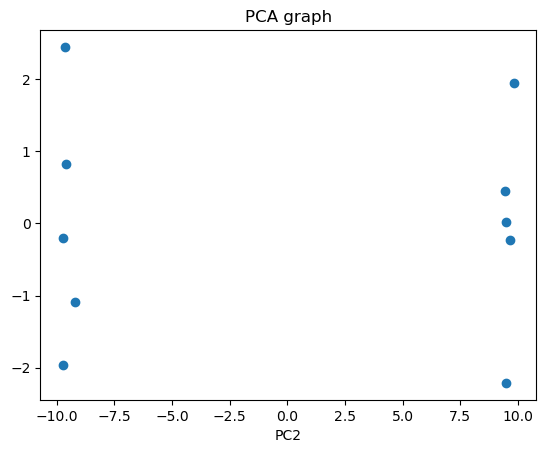

In [70]:
## Create a scatter plot using the first 2 principal components
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA graph')
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.show()